In [55]:
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install statsmodels
# !pip3 install catboost
# !pip3 install openpyxl
# !pip3 install scikit-learn

In [56]:
import pandas as pd

# Загрузка данных
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")

# Сортировка по дате
train = train.sort_values('dt').reset_index(drop=True)
test = test.sort_values('dt').reset_index(drop=True)

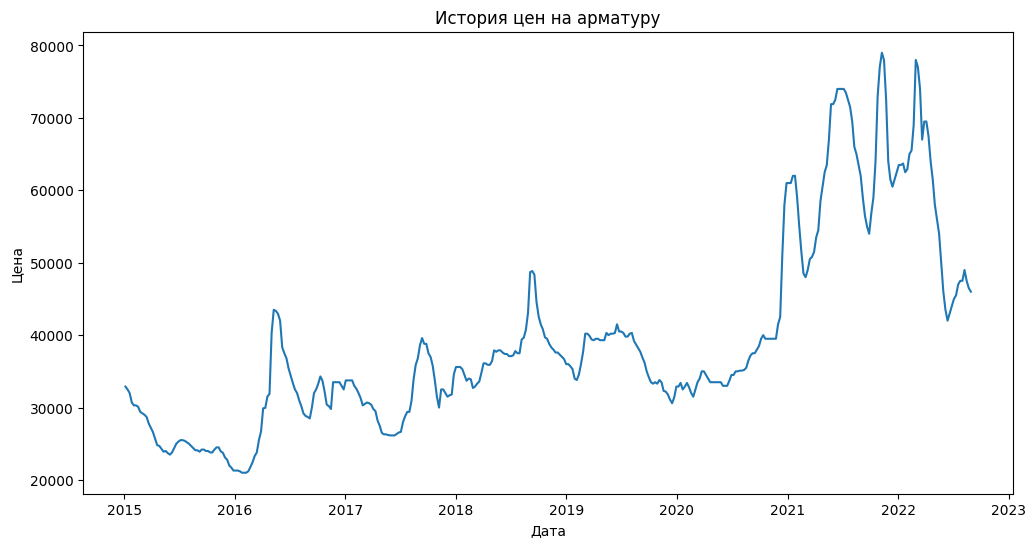

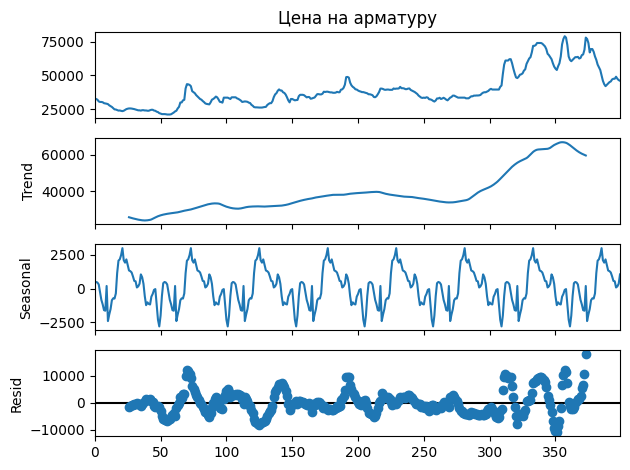

In [57]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# График цен
plt.figure(figsize=(12, 6))
plt.plot(train['dt'], train['Цена на арматуру'])
plt.title('История цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

# Декомпозиция ряда
result = seasonal_decompose(train['Цена на арматуру'], model='additive', period=52)
result.plot()
plt.show()

Генерируем признаки. Создаем лаги для того, чтобы создались цены за прошлые недели(1 - за прошлую, 2- за прошлую и т.д.). Также добавляем скользящее среднее за 8 недель и календарные признаки, которые будут давать понять о сезонности и тренде.

In [58]:
# Создание лагов
for lag in [1, 2, 3, 4]:
    train[f'lag_{lag}'] = train['Цена на арматуру'].shift(lag)

# Скользящее среднее за 8 недель
train['Скользящее среднее'] = train['Цена на арматуру'].rolling(window=8).mean()

# Календарные признаки
train['week'] = train['dt'].dt.isocalendar().week
train['month'] = train['dt'].dt.month

In [59]:
train.head()

,dt,Цена на арматуру,lag_1,lag_2,lag_3,lag_4,Скользящее среднее,week,month
0,2015-01-05,32900,NaN,NaN,NaN,NaN,NaN,2,1
1,2015-01-12,32500,32900.0,NaN,NaN,NaN,NaN,3,1
2,2015-01-19,32000,32500.0,32900.0,NaN,NaN,NaN,4,1
3,2015-01-26,30700,32000.0,32500.0,32900.0,NaN,NaN,5,1
4,2015-02-02,30300,30700.0,32000.0,32500.0,32900.0,NaN,6,2


In [60]:
test.head()

,dt,Цена на арматуру
0,2022-09-05,46000
1,2022-09-12,46000
2,2022-09-19,46000
3,2022-09-26,45500
4,2022-10-03,45500


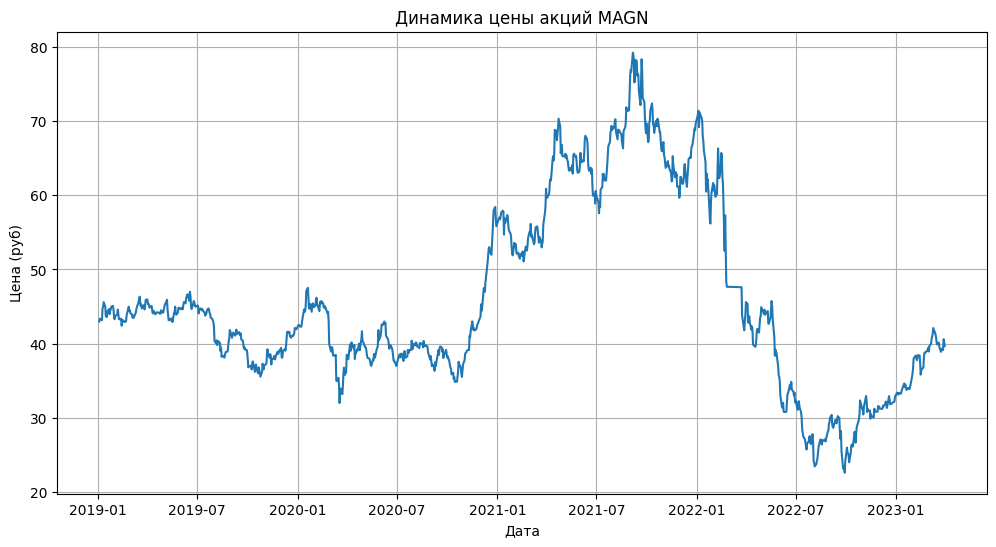

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("excel_files/MAGN Акции.csv", parse_dates=["Дата"], dayfirst=True)

# График цены закрытия
plt.figure(figsize=(12, 6))
plt.plot(df["Дата"], df["Цена"].str.replace(",", ".").astype(float))
plt.title("Динамика цены акций MAGN")
plt.xlabel("Дата")
plt.ylabel("Цена (руб)")
plt.grid()
plt.show()

In [62]:
gruzoperevoski = pd.read_excel('excel_files/Грузоперевозки.xlsx')
gruzoperevoski.head()

,dt,Индекс стоимости грузоперевозок
0,2017-09-06,1000
1,2017-09-13,991
2,2017-09-20,992
3,2017-09-27,979
4,2017-10-04,985


In [63]:
data_from_market = pd.read_excel('excel_files/Данные рынка стройматериалов.xlsx')
data_from_market.head()

,dt,Импорт цемента ЖД,Экспорт цемента ЖД,Отгрузка цемента хоппер ЖД,Отгрузка цемента остальные ЖД,Производство цемента,Импорт цемента,Экспорт цемента,Потребление цемента,Отгрузка цемента,Цена цемента с НДС,Цена цемента без НДС,Производство бетона РФ,Производство бетона МО,Производство бетона СПБ
0,2021-04-30,40.751,27.530,987.540,201.757,2.3891,52.331737,31.49115,2.290941,1.189297,3769.20,4968.10,1.919781,223.405,198.589
1,2021-05-31,69.979,43.423,1071.832,256.733,2.7115,79.639340,50.16415,2.670775,1.328565,3745.23,4822.46,2.059197,293.411,162.181
2,2021-06-30,105.525,58.226,1495.351,446.953,3.8468,125.590100,64.99075,3.984199,1.942304,3790.64,5299.51,2.837929,424.112,254.893
3,2021-07-31,125.093,88.930,1754.576,573.133,4.8559,182.176201,105.96590,4.933510,2.327709,3853.30,5031.96,3.302281,492.623,301.091
4,2021-08-31,124.438,112.454,1859.549,659.929,5.7240,193.681060,141.09315,5.762688,2.519478,3915.07,5240.72,3.788132,562.724,303.961


In [64]:
index_LME = pd.read_excel('excel_files/Индекс LME.xlsx')
index_LME.columns = ["dt", "price"]
index_LME.head()

,dt,price
0,2021-02-12,607
1,2021-02-15,614
2,2021-02-16,615
3,2021-02-17,606
4,2021-02-18,604


In [65]:
Makropokozateli = pd.read_excel('excel_files/Макропоказатели.xlsx')
Makropokozateli.head()

,dt,Базовый индекс потребительских цен на товары и услуги,Ключевая ставка,Курс доллара
0,2016-01-31,NaN,NaN,NaN
1,2016-02-29,NaN,NaN,NaN
2,2016-03-31,NaN,NaN,NaN
3,2016-04-30,NaN,NaN,NaN
4,2016-05-31,NaN,NaN,NaN


In [66]:
Makropokozateli['Базовый индекс потребительских цен на товары и услуги'] = Makropokozateli['Базовый индекс потребительских цен на товары и услуги'].fillna(0)

mean_value = Makropokozateli['Ключевая ставка'].mean()
Makropokozateli['Ключевая ставка'] = Makropokozateli['Ключевая ставка'].fillna(mean_value)

mean_value1 = Makropokozateli['Курс доллара'].mean()
Makropokozateli['Курс доллара'] = Makropokozateli['Курс доллара'].fillna(mean_value1)


In [67]:
pokawateli_rinka_metall = pd.read_excel('excel_files/Показатели рынка металла.xlsx')
pokawateli_rinka_metall.head()

,dt,Производство арматуры Сортовой прокат_Арматура,Производство арматуры Сортовой прокат_Катанка,Производство арматуры Сортовой прокат_Прутки прочие,Производство сырья ЖРС_Агломерат,Производство сырья ЖРС_Аглоруда,Производство сырья ЖРС_Концентрат,Производство сырья ЖРС_Концентрат для дообогащения,Производство сырья ЖРС_Окатыши,Производство сырья Кокс_Кокс валовый,...,Экспорт сырья Лом_Лом стальной,Экспорт сырья Лом_Лом чугуна,Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Всего отгружено с предприятия,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие
0,2016-03-31,527,208,191,5127,376,9063,631,3691,2307,...,0,0,0,0,0,0,0,97,68,50
1,2016-04-30,563,231,216,4776,343,8850,608,3450,2297,...,0,0,0,0,0,0,0,118,79,55
2,2016-05-31,614,263,235,5107,420,9013,626,3849,2481,...,0,0,0,0,0,0,0,123,100,71
3,2016-06-30,659,242,237,4809,400,9275,613,3688,2372,...,0,0,0,0,0,0,0,129,78,61
4,2016-07-31,703,249,238,5147,420,9587,518,4032,2255,...,0,0,0,0,0,0,0,142,90,48


In [68]:
toplivo = pd.read_excel('excel_files/Топливо.xlsx')
toplivo.head()

,dt,Цена на бензин,Цена на дт
0,2017-02-28,35.91,36.15
1,2017-03-31,36.11,36.58
2,2017-04-30,36.41,36.69
3,2017-05-31,36.64,36.80
4,2017-06-30,36.91,36.87


In [69]:
price_for_raw = pd.read_excel('excel_files/Цены на сырье.xlsx')
price_for_raw.head()

,dt,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т",...,"Лом_3А, РФ FCA ж/д Свердловская обл, руб./т, без НДС","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,2015-02-09,3850,228,12344,10009,12728,62,NaN,3700.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-16,3850,206,12271,10432,12852,63,NaN,3700.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-23,3850,207,12645,11981,13034,64,NaN,3700.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-02,3850,214,12696,11912,12910,63,NaN,3700.0,72.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
4,2015-03-09,4400,232,12916,12061,12964,61,NaN,4050.0,70.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN


In [70]:
CHMF_Akcii = pd.read_csv('excel_files/CHMF Акции.csv')
CHMF_Akcii.columns = ['dt', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
CHMF_Akcii.head()

,dt,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,"1,043.20","1,061.00","1,061.00","1,042.00",571.72K,-1.68%
1,03/30/2023,"1,061.00","1,074.60","1,084.80","1,058.00",1.30M,-1.27%
2,03/29/2023,"1,074.60","1,040.60","1,078.40","1,035.40",1.79M,3.53%
3,03/28/2023,"1,038.00","1,041.40","1,044.00","1,033.00",269.09K,-0.17%
4,03/27/2023,"1,039.80","1,036.20","1,042.60","1,032.20",410.74K,0.50%


In [71]:
MAGN_Akcii = pd.read_csv('excel_files/MAGN Акции.csv')
MAGN_Akcii.columns = ['dt', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
MAGN_Akcii.head()

,dt,Price,Open,High,Low,Vol.,Change %
0,31.03.2023,"39,69","40,21","40,24","39,52","18,23M","-1,38%"
1,30.03.2023,"40,24","40,60","41,00","40,02","27,14M","-0,87%"
2,29.03.2023,"40,60","39,15","40,65","38,96","48,70M","3,70%"
3,28.03.2023,"39,15","39,45","39,75","38,91","17,02M","-0,62%"
4,27.03.2023,"39,40","38,99","39,48","38,92","20,95M","1,26%"


In [72]:
NLMK_Akcii = pd.read_csv('excel_files/NLMK Акции.csv')
NLMK_Akcii.columns = ['dt', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
NLMK_Akcii.head()

,dt,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,129.32,130.60,130.60,128.36,3.54M,-0.98%
1,03/30/2023,130.60,132.30,133.44,129.80,4.85M,-0.94%
2,03/29/2023,131.84,128.00,134.44,127.10,10.37M,3.37%
3,03/28/2023,127.54,128.58,128.94,126.56,2.27M,-0.50%
4,03/27/2023,128.18,127.00,128.42,126.86,2.81M,1.33%


In [73]:
# Convert 'dt' columns to datetime format for all DataFrames
gruzoperevoski['dt'] = pd.to_datetime(gruzoperevoski['dt'], dayfirst=True)
train['dt'] = pd.to_datetime(train['dt'], dayfirst=True)
data_from_market['dt'] = pd.to_datetime(data_from_market['dt'], dayfirst=True)
index_LME['dt'] = pd.to_datetime(index_LME['dt'], dayfirst=True)
Makropokozateli['dt'] = pd.to_datetime(Makropokozateli['dt'], dayfirst=True)
pokawateli_rinka_metall['dt'] = pd.to_datetime(pokawateli_rinka_metall['dt'], dayfirst=True)
toplivo['dt'] = pd.to_datetime(toplivo['dt'], dayfirst=True)
price_for_raw['dt'] = pd.to_datetime(price_for_raw['dt'], dayfirst=True)
CHMF_Akcii['dt'] = pd.to_datetime(CHMF_Akcii['dt'], dayfirst=True)
MAGN_Akcii['dt'] = pd.to_datetime(MAGN_Akcii['dt'], dayfirst=True)
NLMK_Akcii['dt'] = pd.to_datetime(NLMK_Akcii['dt'], dayfirst=True)

# Merge all datasets with the training dataset on the 'dt' column
train = train.merge(gruzoperevoski, on='dt', how='left')
train = train.merge(data_from_market, on='dt', how='left')
train = train.merge(index_LME, on='dt', how='left')
train = train.merge(Makropokozateli, on='dt', how='left')
train = train.merge(pokawateli_rinka_metall, on='dt', how='left')
train = train.merge(toplivo, on='dt', how='left')
train = train.merge(price_for_raw, on='dt', how='left')
train = train.merge(CHMF_Akcii, on='dt', how='left')
train = train.merge(MAGN_Akcii, on='dt', how='left')
train = train.merge(NLMK_Akcii, on='dt', how='left')


C:\Users\Vlad\AppData\Local\Temp\ipykernel_12304\2490968149.py:10: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  CHMF_Akcii['dt'] = pd.to_datetime(CHMF_Akcii['dt'], dayfirst=True)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_12304\2490968149.py:12: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  NLMK_Akcii['dt'] = pd.to_datetime(NLMK_Akcii['dt'], dayfirst=True)


In [74]:
output_file_train = 'train_output.xlsx'
train.to_excel(output_file_train, index=False)

In [75]:
train.head()

,dt,Цена на арматуру,lag_1,lag_2,lag_3,lag_4,Скользящее среднее,week,month,Индекс стоимости грузоперевозок,...,High_y,Low_y,Vol._y,Change %_y,Price,Open,High,Low,Vol.,Change %
0,2015-01-05,32900,NaN,NaN,NaN,NaN,NaN,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-12,32500,32900.0,NaN,NaN,NaN,NaN,3,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-19,32000,32500.0,32900.0,NaN,NaN,NaN,4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-26,30700,32000.0,32500.0,32900.0,NaN,NaN,5,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-02,30300,30700.0,32000.0,32500.0,32900.0,NaN,6,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
train.dtypes

dt                  datetime64[ns]
Цена на арматуру             int64
lag_1                      float64
lag_2                      float64
lag_3                      float64
                         ...      
Open                       float64
High                       float64
Low                        float64
Vol.                        object
Change %                    object
Length: 186, dtype: object

In [77]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Загрузка данных
data = pd.read_excel("train_output.xlsx")

# 1. Удаление столбцов с >70% пропусков
threshold = 0.7
data = data.loc[:, data.isnull().mean() < threshold]

# 2. Разделение данных по типам
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
date_col = 'dt'

# 3. Работа с временным индексом
data = data.set_index(date_col).sort_index()

# 4. Заполнение числовых данных
data[numeric_cols] = data[numeric_cols].interpolate(method='time').ffill().bfill()

# 5. Исправление ошибки для категориальных данных
if not categorical_cols.empty:
    for col in categorical_cols:
        # Проверка, есть ли в колонке строковые значения
        if data[col].apply(lambda x: isinstance(x, str)).any():
            # Заполнение последним известным значением (ffill)
            data[col] = data[col].fillna(method='ffill').fillna(data[col].mode().iloc[0] if not data[col].mode().empty else 'Unknown')
        else:
            # Если данные не строковые, но колонка распознана как object
            data[col] = data[col].ffill()

# 6. Итеративная импутация для числовых колонок
if not numeric_cols.empty:
    imputer = IterativeImputer(random_state=0, max_iter=10)
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# 7. Проверка результата
print("Оставшиеся пропуски:")
print(data.isnull().sum())

# 8. Сохранение
data.reset_index().to_excel("processed_data.xlsx", index=False)

C:\Users\Vlad\AppData\Local\Temp\ipykernel_12304\3344325335.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[col] = data[col].fillna(method='ffill').fillna(data[col].mode().iloc[0] if not data[col].mode().empty else 'Unknown')


Оставшиеся пропуски:
Цена на арматуру    0
lag_1               0
lag_2               0
lag_3               0
lag_4               0
                   ..
Open                0
High                0
Low                 0
Vol.                0
Change %            0
Length: 72, dtype: int64


In [79]:
# Заменить запятые в числовых колонках и преобразовать в float
for column in data.columns:
    if data[column].dtype == 'object':
        # Пробуем преобразовать, игнорируя ошибки (нечисловые значения станут NaN)
        data[column] = pd.to_numeric(data[column].astype(str).str.replace(',', ''), errors='coerce')

In [80]:
# Проверить типы данных
print(data.dtypes)

# Если есть категориальные признаки, их нужно явно указать CatBoost
categorical_features = [...]  # Список категориальных колонок

Цена на арматуру    float64
lag_1               float64
lag_2               float64
lag_3               float64
lag_4               float64
                     ...   
Open                float64
High                float64
Low                 float64
Vol.                float64
Change %            float64
Length: 72, dtype: object


In [83]:
# Посмотреть название колонки с индексом 53
column_53 = data.columns[53]
print("Название колонки:", column_53)

# Показать уникальные значения в этой колонке
print(data.iloc[:, 53].unique())

Название колонки: ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой,  $/т
[125.5 127.  116.  112.  110.  111.5 109.  115.  119.  122.  122.5 116.5
 128.5 142.5 139.5 146.5 145.5 159.5 164.5 134.5 112.5 107.5 106.  109.5
 103.5 110.5 101.  113.  117.5 120.  136.5 175.  189.  191.5 195.  222.5
 248.5 265.  268.  211.5 163.5 149.  137.  151.5 184.5 195.5 198.5 210.
 181.  178.5 159.  163. ]


In [84]:
# Заменить запятые и преобразовать в числовой формат
data.iloc[:, 53] = data.iloc[:, 53].astype(str).str.replace(',', '').astype(float)

In [85]:
# Преобразовать все колонки с типом 'object' в float (если это числовые данные)
for col in data.select_dtypes(include=['object']).columns:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')

# Заполнить пропуски (если они появились)
data = data.fillna(data.mean())

In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Разделение данных
X = data.drop(columns=['Цена на арматуру'])
y = data['Цена на арматуру']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Указать категориальные признаки (если есть)
categorical_features = []  # Заменить на список индексов категориальных колонок

# Обучение модели
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    cat_features=categorical_features,
    verbose=100
)

# Сохранение модели
model.save_model('catboost_model.cbm')

CatBoostError: Invalid cat_features[0] = Ellipsis value type=<class 'ellipsis'>: must be int().